In [4]:
from google.colab import files
uploaded = files.upload()

Saving labeled_vectors.csv to labeled_vectors.csv


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("labeled_vectors.csv")

# Show label distribution
print("📊 Full Dataset Label Distribution:")
print(df["label"].value_counts())

# Ensure we only keep numeric columns for features
# First drop non-feature columns, then select only numeric columns
X = df.drop(columns=["graph_id", "clean_id", "label"], errors='ignore').select_dtypes(include=['number'])
y = df["label"]

# Verify we have the right columns
print("\n🔍 Features being used:")
print(X.columns.tolist())

# Split: 80% train, 20% test (stratified to preserve class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Show split results
print("\n✅ Train set size:", len(X_train))
print("   Label distribution:", y_train.value_counts().to_dict())

print("\n✅ Test set size:", len(X_test))
print("   Label distribution:", y_test.value_counts().to_dict())

# Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Confirm resampling
print("\n✅ SMOTE applied successfully!")
print("Resampled train set shape:", X_train_res.shape)
print("Resampled label counts:", pd.Series(y_train_res).value_counts().to_dict())

# Original test set remains unchanged
print("\nTest set shape remains:", X_test.shape)

📊 Full Dataset Label Distribution:
label
1    873
0    300
Name: count, dtype: int64

🔍 Features being used:
['AAAA_AAAA', 'AAAA_AAAC', 'AAAA_AAAG', 'AAAA_AAAT', 'AAAC_AACA', 'AAAC_AACC', 'AAAC_AACG', 'AAAC_AACT', 'AAAG_AAGA', 'AAAG_AAGC', 'AAAG_AAGG', 'AAAG_AAGT', 'AAAT_AATA', 'AAAT_AATC', 'AAAT_AATG', 'AAAT_AATT', 'AACA_ACAA', 'AACA_ACAC', 'AACA_ACAG', 'AACA_ACAT', 'AACC_ACCA', 'AACC_ACCC', 'AACC_ACCG', 'AACC_ACCT', 'AACG_ACGA', 'AACG_ACGC', 'AACG_ACGG', 'AACG_ACGT', 'AACT_ACTA', 'AACT_ACTC', 'AACT_ACTG', 'AACT_ACTT', 'AAGA_AGAA', 'AAGA_AGAC', 'AAGA_AGAG', 'AAGA_AGAT', 'AAGC_AGCA', 'AAGC_AGCC', 'AAGC_AGCG', 'AAGC_AGCT', 'AAGG_AGGA', 'AAGG_AGGC', 'AAGG_AGGG', 'AAGG_AGGT', 'AAGT_AGTA', 'AAGT_AGTC', 'AAGT_AGTG', 'AAGT_AGTT', 'AATA_ATAA', 'AATA_ATAC', 'AATA_ATAG', 'AATA_ATAT', 'AATC_ATCA', 'AATC_ATCC', 'AATC_ATCG', 'AATC_ATCT', 'AATG_ATGA', 'AATG_ATGC', 'AATG_ATGG', 'AATG_ATGT', 'AATT_ATTA', 'AATT_ATTC', 'AATT_ATTG', 'AATT_ATTT', 'ACAA_CAAA', 'ACAA_CAAC', 'ACAA_CAAG', 'ACAA_CAAT', 'ACAC_

In [6]:
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (938, 1024)
y_train: (938,)
X_test: (235, 1024)
y_test: (235,)


1.AdaBoost Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score
import pandas as pd

# Create and train the AdaBoost model
boosting = AdaBoostClassifier(n_estimators=1200, random_state=0)
boosting.fit(X_train_res, y_train_res)

# Make predictions
y_pred_boost = boosting.predict(X_test)

# Evaluation
print("Boosting (AdaBoost) Accuracy:", accuracy_score(y_test, y_pred_boost))
print("Classification Report:\n", classification_report(y_test, y_pred_boost))
print("Cohen's Kappa Score:", cohen_kappa_score(y_test, y_pred_boost))


Boosting (AdaBoost) Accuracy: 0.8297872340425532
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.57      0.63        60
           1       0.86      0.92      0.89       175

    accuracy                           0.83       235
   macro avg       0.78      0.74      0.76       235
weighted avg       0.82      0.83      0.82       235

Cohen's Kappa Score: 0.5208970438328235


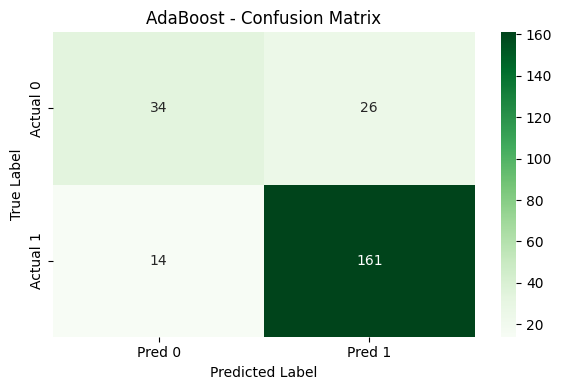

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm_boost = confusion_matrix(y_test, y_pred_boost)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("AdaBoost - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


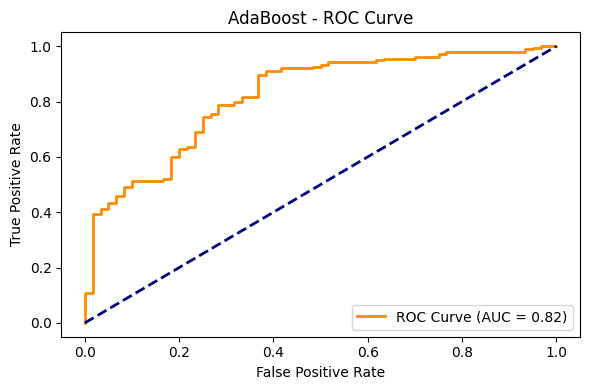

In [ ]:



from sklearn.metrics import roc_curve, auc

# Get probability scores for the positive class
y_proba_boost = boosting.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_boost, tpr_boost, _ = roc_curve(y_test, y_proba_boost)
roc_auc_boost = auc(fpr_boost, tpr_boost)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_boost, tpr_boost, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_boost:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("AdaBoost - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


2.Voting Classifier

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:01:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best threshold found: 0.60 with accuracy: 0.8043
Final Accuracy: 0.8042553191489362

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.58      0.60        60
           1       0.86      0.88      0.87       175

    accuracy                           0.80       235
   macro avg       0.74      0.73      0.74       235
weighted avg       0.80      0.80      0.80       235


Confusion Matrix:
 [[ 35  25]
 [ 21 154]]


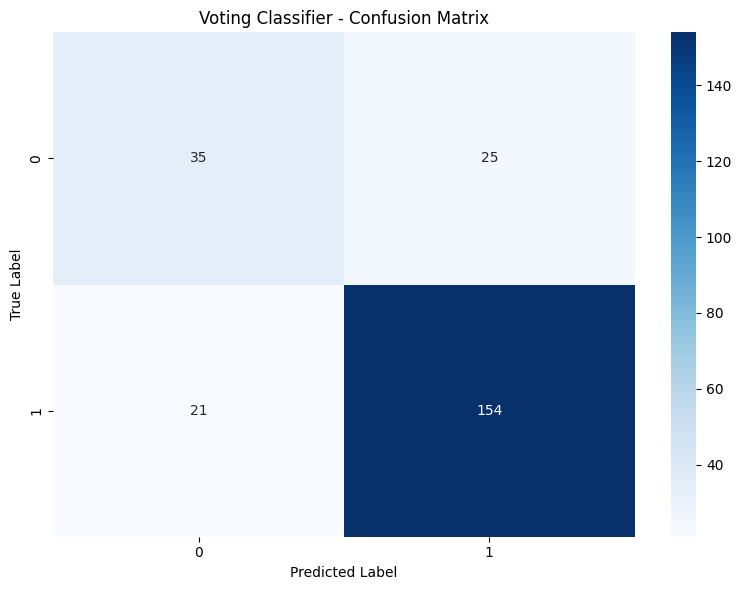

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 3. Initialize base classifiers with suitable hyperparameters
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
et = ExtraTreesClassifier(n_estimators=200, class_weight='balanced', random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, scale_pos_weight=1)

# 4. Create Voting Classifier with soft voting to leverage probabilities
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('et', et), ('xgb', xgb)],
    voting='soft'
)

# 5. Train Voting Classifier on resampled balanced training data
voting_clf.fit(X_train_res, y_train_res)

# 6. Predict probabilities on test set (positive class probabilities)
y_proba = voting_clf.predict_proba(X_test)[:, 1]

# 7. Threshold tuning to maximize accuracy based on confusion matrix diagonal sum
best_threshold = 0.5
best_score = 0

for thr in np.arange(0.1, 0.9, 0.05):
    y_pred_thr = (y_proba >= thr).astype(int)
    cm = confusion_matrix(y_test, y_pred_thr)
    score = cm.diagonal().sum() / cm.sum()  # accuracy based on cm
    if score > best_score:
        best_score = score
        best_threshold = thr

print(f"Best threshold found: {best_threshold:.2f} with accuracy: {best_score:.4f}")

# 8. Make final predictions using the best threshold
y_pred_best = (y_proba >= best_threshold).astype(int)

# 9. Evaluation Metrics and Confusion Matrix
print("Final Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

cm_final = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix:\n", cm_final)

# 10. Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title("Voting Classifier - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


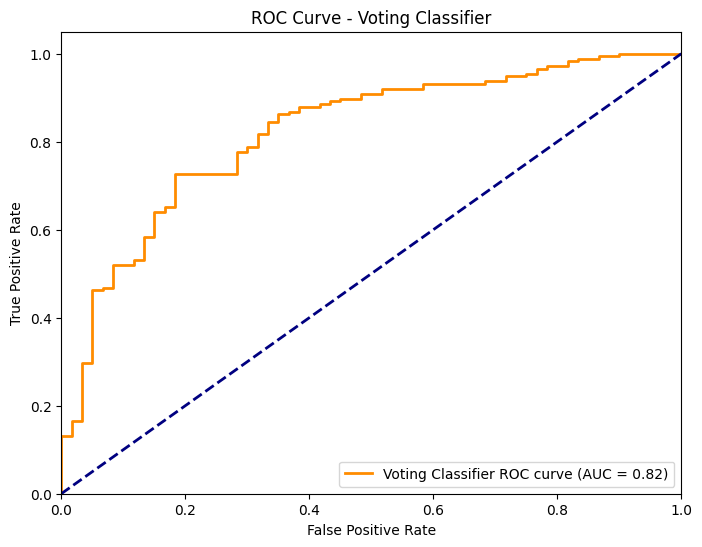

Voting Classifier ROC AUC: 0.8214


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_proba are the predicted probabilities of the positive class from the Voting Classifier using soft voting:
# y_proba = voting_clf.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds for voting classifier
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve for the Voting Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Voting Classifier ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Classifier')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()

print(f"Voting Classifier ROC AUC: {roc_auc:.4f}")


3.DenseNet

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.6162 - loss: 0.7879 - val_accuracy: 0.4500 - val_loss: 1.0328
Epoch 2/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7160 - loss: 0.5618 - val_accuracy: 0.4714 - val_loss: 1.2352
Epoch 3/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7207 - loss: 0.5530 - val_accuracy: 0.5429 - val_loss: 0.7569
Epoch 4/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7747 - loss: 0.4949 - val_accuracy: 0.6250 - val_loss: 0.8003
Epoch 5/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7551 - loss: 0.4571 - val_accuracy: 0.7500 - val_loss: 0.4796
Epoch 6/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8001 - loss: 0.4064 - val_accuracy: 0.9357 - val_loss: 0.2791
Epoch 7/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8117 - loss: 0.4170 - val_accuracy: 0.7321 - val_loss: 0.4450
Epoch 8/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8129 - loss: 0.3791 - val_accuracy: 0.8893 - v

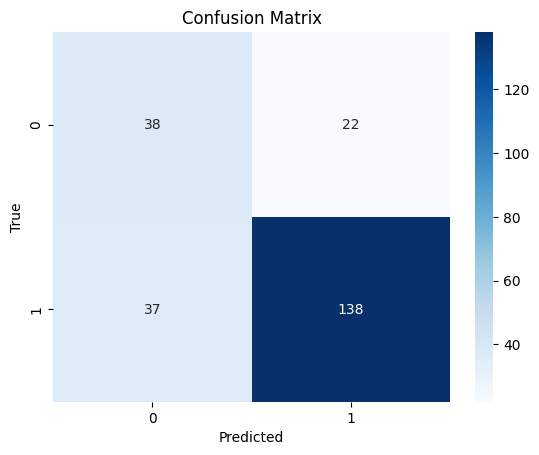

📈 ROC AUC Score: 0.7865714285714286
🧮 Kappa Score: 0.38987898789878994


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1. Load and Preprocess Data
#
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 2. Build DenseNet-like Model
# -------------------------------
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# -------------------------------
# 3. Train the Model
# -------------------------------
history = model.fit(X_train_scaled, y_train_res,
                    validation_split=0.2,
                    epochs=40,
                    batch_size=32,
                    verbose=1)

# -------------------------------
# 4. Evaluate Performance
# -------------------------------
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Classification Report
print("🎯 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("📉 Confusion Matrix:\n", cm)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("📈 ROC AUC Score:", roc_auc)

# Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)
print("🧮 Kappa Score:", kappa)

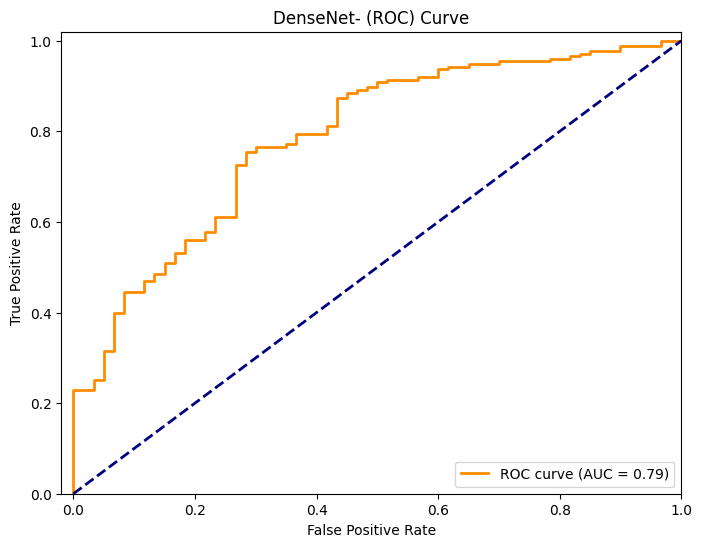

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve without grid
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DenseNet- (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


4.Bagging

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# ============================
# 1. Stratified Train-Test Split
# Keeps same class ratio in train and test sets
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0
)

# ============================
# 2. Balance the TRAINING data only (SMOTE or any method)
# ============================
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# ============================
# 3. Base Model with Class Weights
# This ensures minority class gets more importance
# ============================
base_model = DecisionTreeClassifier(
    class_weight='balanced',  # penalize mistakes on minority class
    max_depth=10,             # control overfitting
    min_samples_split=5,
    random_state=0
)

# ============================
# 4. Bagging Ensemble
# ============================
bagging = BaggingClassifier(
    estimator=base_model,
    n_estimators=200,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    random_state=0
)

# Train
bagging.fit(X_train_res, y_train_res)

# ============================
# 5. Evaluation
# ============================
y_pred_bagging = bagging.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))
print(confusion_matrix(y_test, y_pred_bagging))
kappa = cohen_kappa_score(y_test, y_pred_bagging)
print("Cohen's Kappa Score:", kappa)



Bagging Accuracy: 0.7531914893617021
              precision    recall  f1-score   support

           0       0.52      0.55      0.53        60
           1       0.84      0.82      0.83       175

    accuracy                           0.75       235
   macro avg       0.68      0.69      0.68       235
weighted avg       0.76      0.75      0.76       235

[[ 33  27]
 [ 31 144]]
Cohen's Kappa Score: 0.3648648648648648


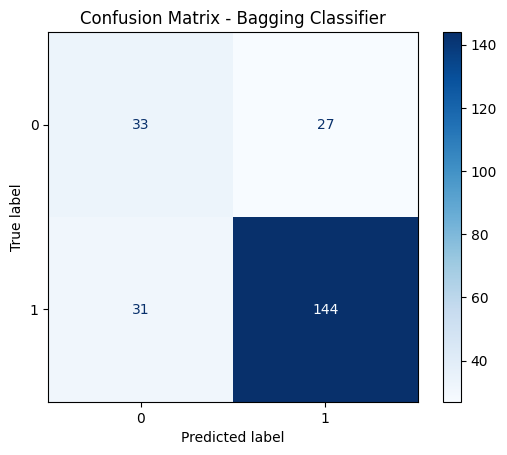

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_bagging))

cm_display.plot(cmap=plt.cm.Blues)  # Blues color map for better visualization
plt.title("Confusion Matrix - Bagging Classifier")
plt.show()


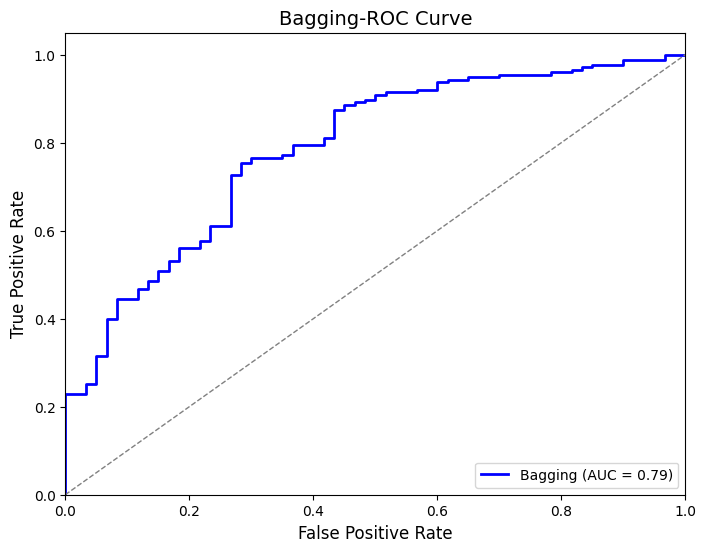

In [ ]:
# Plot the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Bagging (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Bagging-ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(False)
plt.show()

5.Gradient Boosting

🎯 Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.48      0.54        60
           1       0.83      0.89      0.86       175

    accuracy                           0.79       235
   macro avg       0.72      0.69      0.70       235
weighted avg       0.78      0.79      0.78       235

📉 Confusion Matrix:
 [[ 29  31]
 [ 19 156]]


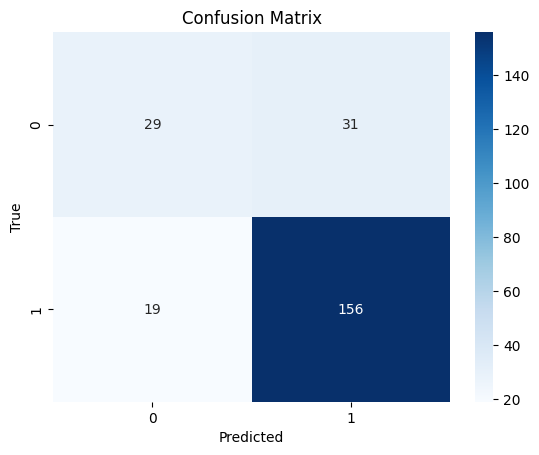

📈 ROC AUC Score: 0.7984761904761905
🧮 Kappa Score: 0.4011213047910295


In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("labeled_vectors.csv")

# Prepare features and labels
X = df.drop(columns=["graph_id", "clean_id", "label"], errors='ignore').select_dtypes(include=['number'])
y = df["label"]

# Stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE on training set to balance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Initialize Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Train model
gbc.fit(X_train_scaled, y_train_res)

# Predict probabilities and classes on test set
y_pred_prob = gbc.predict_proba(X_test_scaled)[:, 1]
y_pred = gbc.predict(X_test_scaled)

# Classification Report
print("🎯 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("📉 Confusion Matrix:\n", cm)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("📈 ROC AUC Score:", roc_auc)

# Cohen Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)
print("🧮 Kappa Score:", kappa)


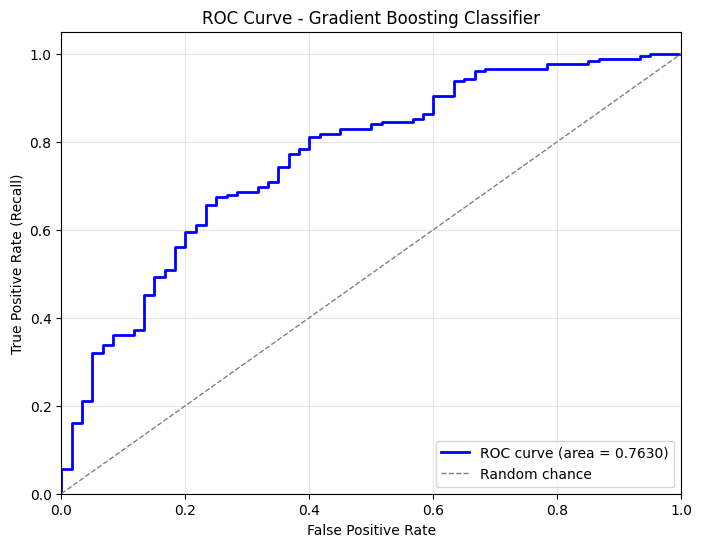

In [25]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


# 6. Convolutional Neural Network (CNN)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Using existing scaler and reshaping.
Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.5701 - loss: 0.8321 - val_accuracy: 0.5957 - val_loss: 0.6199
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.6942 - loss: 0.5863 - val_accuracy: 0.5915 - val_loss: 0.7043
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.7730 - loss: 0.4860 - val_accuracy: 0.7574 - val_loss: 0.6120
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8298 - loss: 0.3970 - val_accuracy: 0.7489 - val_loss: 0.5421
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.8598 - loss: 0.3331 - val_accuracy: 0.7362 - val_loss: 0.6412
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.8474 - loss: 0.3211 - val_accuracy: 0.7872 - val_loss: 0.5898
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9008 - loss: 0.2557 - val_accuracy: 0.7021 - val_loss: 0.7535
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9045 - 

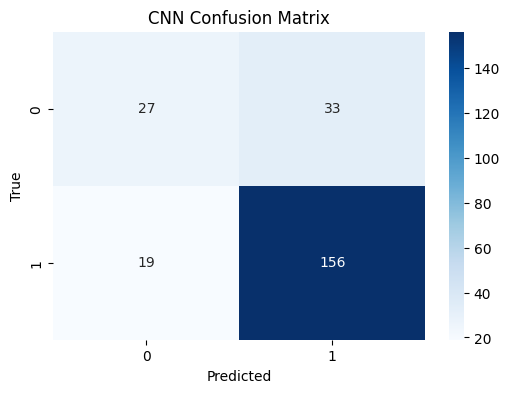

📈 CNN ROC AUC: 0.7959
🧮 CNN Kappa Score: 0.3698


In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Data preparation (assuming X_train_res, y_train_res, X_test, y_test are available)

# Reshape data for CNN (e.g., into a 1D sequence)
# We need to reshape the 1024 features. Let's try reshaping into a 32x32 "image" or a 1D sequence of 1024 steps with 1 feature.
# A 1D sequence of 1024 steps with 1 feature seems more appropriate for k-mer counts.
timesteps_cnn = 1024
features_cnn = 1

X_train_reshaped_cnn = X_train_res.values.reshape(-1, timesteps_cnn, features_cnn)
X_test_reshaped_cnn = X_test.values.reshape(-1, timesteps_cnn, features_cnn)

# Normalize features
# Using the scaler fitted on the SMOTE resampled training data from previous steps if available,
# otherwise fit a new one on X_train_res
try:
    X_train_scaled_cnn = scaler.transform(X_train_res).reshape(-1, timesteps_cnn, features_cnn)
    X_test_scaled_cnn = scaler.transform(X_test).reshape(-1, timesteps_cnn, features_cnn)
    print("Using existing scaler and reshaping.")
except NameError:
    print("Fitting new scaler and reshaping.")
    scaler = StandardScaler()
    X_train_scaled_cnn = scaler.fit_transform(X_train_res).reshape(-1, timesteps_cnn, features_cnn)
    X_test_scaled_cnn = scaler.transform(X_test).reshape(-1, timesteps_cnn, features_cnn)


# Build CNN model
model_cnn = models.Sequential([
    layers.Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(timesteps_cnn, features_cnn)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=64, kernel_size=5, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid') # Binary classification
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_cnn = model_cnn.fit(X_train_scaled_cnn, y_train_res,
                             epochs=20, # Can adjust epochs
                             batch_size=32, # Can adjust batch size
                             validation_data=(X_test_scaled_cnn, y_test),
                             verbose=1)

# Predict on test set
y_pred_prob_cnn = model_cnn.predict(X_test_scaled_cnn).flatten()
y_pred_cnn = (y_pred_prob_cnn >= 0.5).astype(int)

# Evaluate
print("🎯 CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))

print("📉 CNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cnn))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_cnn), annot=True, fmt='d', cmap='Blues')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC AUC
roc_auc_cnn = roc_auc_score(y_test, y_pred_prob_cnn)
print(f"📈 CNN ROC AUC: {roc_auc_cnn:.4f}")

# Cohen Kappa Score (need to import cohen_kappa_score if not already)
try:
    kappa_cnn = cohen_kappa_score(y_test, y_pred_cnn)
    print(f"🧮 CNN Kappa Score: {kappa_cnn:.4f}")
except NameError:
    from sklearn.metrics import cohen_kappa_score
    kappa_cnn = cohen_kappa_score(y_test, y_pred_cnn)
    print(f"🧮 CNN Kappa Score: {kappa_cnn:.4f}")

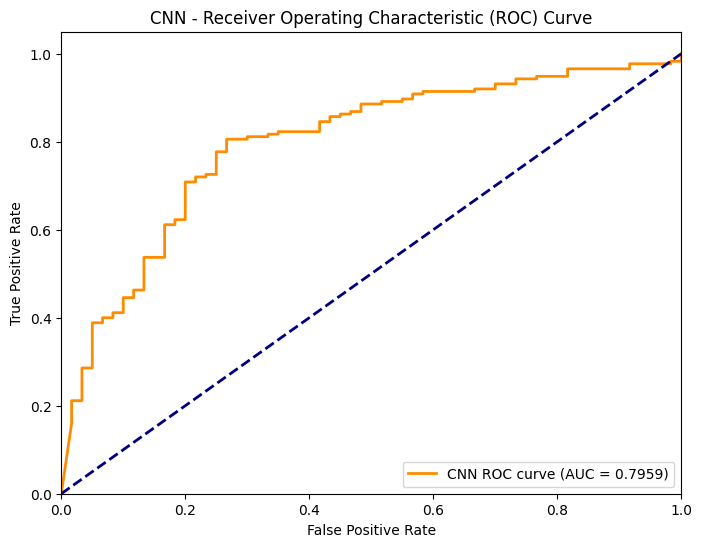

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC Curve for CNN
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_prob_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label=f'CNN ROC curve (AUC = {roc_auc_cnn:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

# 7. Simple Recurrent Neural Network (RNN)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5971 - loss: 0.6924 - val_accuracy: 0.6000 - val_loss: 0.6446
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7006 - loss: 0.5810 - val_accuracy: 0.5745 - val_loss: 0.6518
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7401 - loss: 0.5159 - val_accuracy: 0.6894 - val_loss: 0.5814
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8059 - loss: 0.4508 - val_accuracy: 0.7149 - val_loss: 0.5716
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8225 - loss: 0.4057 - val_accuracy: 0.7277 - val_loss: 0.5547
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8569 - loss: 0.3418 - val_accuracy: 0.6340 - val_loss: 0.6671
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8517 - loss: 0.3376 - val_accuracy: 0.6766 - val_loss: 0.6184
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8684 - loss: 0.3047 - val_accuracy: 0.7660 - val_loss: 0.

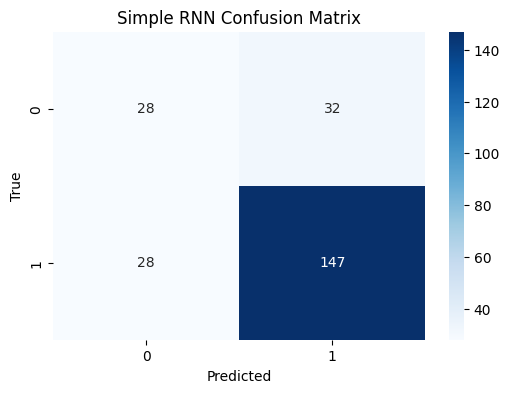

📈 Simple RNN ROC AUC Score: 0.7386666666666667
🧮 Simple RNN Kappa Score: 0.3135345666991236


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.optimizers import Adam # Import Adam

# Data preparation (assuming X_train_res, y_train_res, X_test, y_test are available)
# Reshape data for RNN (e.g., 1024 features into 32 timesteps with 32 features each)
# This reshaping is necessary for SimpleRNN, LSTM, and BiLSTM layers.
timesteps_rnn = 32
features_per_step_rnn = 32

# Ensure the total number of features matches the original data dimension
if timesteps_rnn * features_per_step_rnn != X_train_res.shape[1]:
    print(f"Warning: Reshape dimensions ({timesteps_rnn} * {features_per_step_rnn}) do not match original feature count ({X_train_res.shape[1]}). Adjusting features_per_step_rnn.")
    # Adjust features_per_step_rnn to match if possible, or choose different timesteps
    # For 1024 features, 32x32 is a valid reshape.
    if X_train_res.shape[1] % timesteps_rnn == 0:
         features_per_step_rnn = X_train_res.shape[1] // timesteps_rnn
         print(f"Adjusted features_per_step_rnn to {features_per_step_rnn}")
    else:
         print("Cannot reshape features evenly with chosen timesteps. Please choose different timesteps.")
         # Fallback or choose a different reshaping strategy if needed


X_train_reshaped_rnn = X_train_res.values.reshape(-1, timesteps_rnn, features_per_step_rnn)
X_test_reshaped_rnn = X_test.values.reshape(-1, timesteps_rnn, features_per_step_rnn)

# Normalize features (fit scaler on flattened train data)
scaler_rnn = StandardScaler()
X_train_flat_rnn = X_train_reshaped_rnn.reshape(-1, timesteps_rnn * features_per_step_rnn)
X_test_flat_rnn = X_test_reshaped_rnn.reshape(-1, timesteps_rnn * features_per_step_rnn)

X_train_scaled_flat_rnn = scaler_rnn.fit_transform(X_train_flat_rnn)
X_test_scaled_flat_rnn = scaler_rnn.transform(X_test_flat_rnn)

# Reshape back to 3D for RNN input
X_train_scaled_rnn = X_train_scaled_flat_rnn.reshape(-1, timesteps_rnn, features_per_step_rnn)
X_test_scaled_rnn = X_test_scaled_flat_rnn.reshape(-1, timesteps_rnn, features_per_step_rnn)


# Compute class weights (using resampled data for weight calculation)
try: # Check if class_weight is already imported
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_res), y=y_train_res)
    class_weight_dict = dict(enumerate(class_weights))
except NameError: # Import if not
    from sklearn.utils import class_weight
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_res), y=y_train_res)
    class_weight_dict = dict(enumerate(class_weights))


# Build Simple RNN model
model_rnn = models.Sequential([
    layers.SimpleRNN(64, input_shape=(timesteps_rnn, features_per_step_rnn)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid') # Binary classification
])

# Compile model
optimizer = Adam(learning_rate=0.001)
model_rnn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train model with class weights and early stopping
history_rnn = model_rnn.fit(X_train_scaled_rnn, y_train_res,
                            validation_data=(X_test_scaled_rnn, y_test),
                            epochs=30, # Can adjust epochs
                            batch_size=32, # Can adjust batch size
                            class_weight=class_weight_dict,
                            callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
                            verbose=1)

# Predict probabilities and classes on test set
y_pred_prob_rnn = model_rnn.predict(X_test_scaled_rnn).flatten()
y_pred_rnn = (y_pred_prob_rnn >= 0.5).astype(int)

# Evaluate
print("🎯 Simple RNN Classification Report:")
print(classification_report(y_test, y_pred_rnn))

print("📉 Simple RNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rnn))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rnn), annot=True, fmt='d', cmap='Blues')
plt.title("Simple RNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC AUC Score
roc_auc_rnn = roc_auc_score(y_test, y_pred_prob_rnn)
print("📈 Simple RNN ROC AUC Score:", roc_auc_rnn)

# Cohen Kappa Score
try: # Check if cohen_kappa_score is already imported
    kappa_rnn = cohen_kappa_score(y_test, y_pred_rnn)
    print("🧮 Simple RNN Kappa Score:", kappa_rnn)
except NameError: # Import if not
    from sklearn.metrics import cohen_kappa_score
    kappa_rnn = cohen_kappa_score(y_test, y_pred_rnn)
    print(f"🧮 Simple RNN Kappa Score: {kappa_rnn:.4f}")

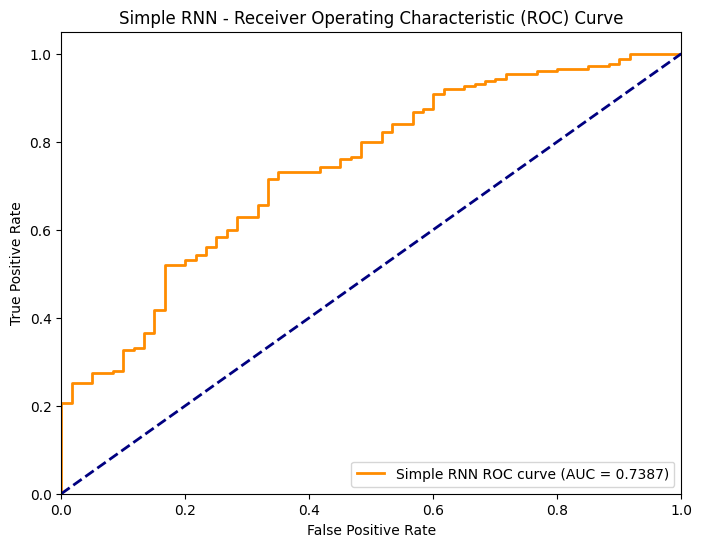

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC Curve for Simple RNN
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, y_pred_prob_rnn)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rnn, tpr_rnn, color='darkorange', lw=2, label=f'Simple RNN ROC curve (AUC = {roc_auc_rnn:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Simple RNN - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

#8.LSTM

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Reshape your data into (samples, timesteps, features_per_step)
# For example: reshape 1024 into (32, 32)
timesteps = 32
features_per_step = 32

X_train_reshaped = X_train_res.values.reshape(-1, timesteps, features_per_step)
X_test_reshaped = X_test.values.reshape(-1, timesteps, features_per_step)

# Normalize features (fit scaler on train reshape flatten)
scaler = StandardScaler()
X_train_flat = X_train_reshaped.reshape(-1, timesteps * features_per_step)
X_test_flat = X_test_reshaped.reshape(-1, timesteps * features_per_step)

X_train_scaled_flat = scaler.fit_transform(X_train_flat)
X_test_scaled_flat = scaler.transform(X_test_flat)

# Reshape back to 3D
X_train_scaled = X_train_scaled_flat.reshape(-1, timesteps, features_per_step)
X_test_scaled = X_test_scaled_flat.reshape(-1, timesteps, features_per_step)

# Build LSTM model
model = models.Sequential([
    layers.LSTM(64, input_shape=(timesteps, features_per_step)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, y_train_res,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    verbose=2)

# Predict on test set
y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc:.4f}")


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 - 7s - 148ms/step - accuracy: 0.5716 - loss: 0.6793 - val_accuracy: 0.6511 - val_loss: 0.6339
Epoch 2/30
44/44 - 2s - 45ms/step - accuracy: 0.6497 - loss: 0.6418 - val_accuracy: 0.6553 - val_loss: 0.6117
Epoch 3/30
44/44 - 2s - 44ms/step - accuracy: 0.6769 - loss: 0.6090 - val_accuracy: 0.6468 - val_loss: 0.6127
Epoch 4/30
44/44 - 1s - 29ms/step - accuracy: 0.6920 - loss: 0.5847 - val_accuracy: 0.6766 - val_loss: 0.5882
Epoch 5/30
44/44 - 1s - 16ms/step - accuracy: 0.7156 - loss: 0.5503 - val_accuracy: 0.6809 - val_loss: 0.5677
Epoch 6/30
44/44 - 1s - 16ms/step - accuracy: 0.7607 - loss: 0.5242 - val_accuracy: 0.6638 - val_loss: 0.6011
Epoch 7/30
44/44 - 1s - 16ms/step - accuracy: 0.7751 - loss: 0.4906 - val_accuracy: 0.7191 - val_loss: 0.5495
Epoch 8/30
44/44 - 1s - 28ms/step - accuracy: 0.7744 - loss: 0.4643 - val_accuracy: 0.7106 - val_loss: 0.5475
Epoch 9/30
44/44 - 1s - 27ms/step - accuracy: 0.8095 - loss: 0.4110 - val_accuracy: 0.7234 - val_loss: 0.5683
Epoch 10/30
44/44 - 

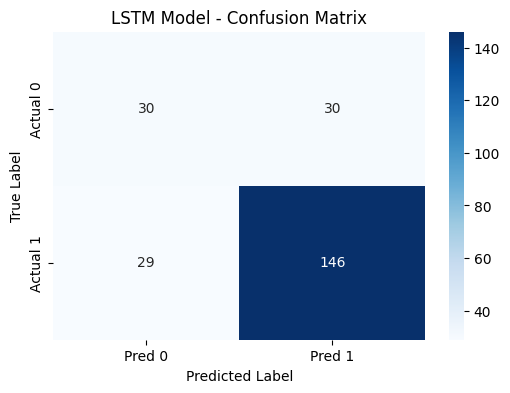

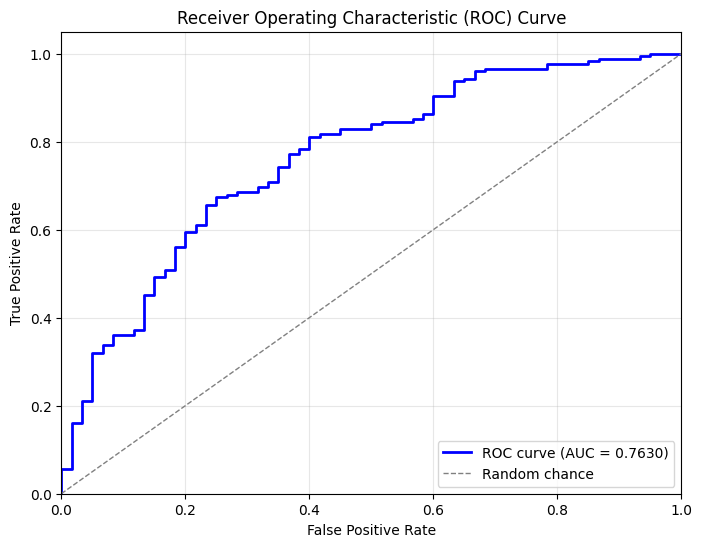

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("LSTM Model - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--', label='Random chance')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


# 9. Multi-layer Perceptron (MLP)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Using existing scaler.
Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.5634 - loss: 0.8824 - val_accuracy: 0.5319 - val_loss: 0.7842
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6145 - loss: 0.7277 - val_accuracy: 0.6255 - val_loss: 0.6475
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6733 - loss: 0.6413 - val_accuracy: 0.6340 - val_loss: 0.6040
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7021 - loss: 0.6054 - val_accuracy: 0.7532 - val_loss: 0.5141
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7248 - loss: 0.5599 - val_accuracy: 0.7319 - val_loss: 0.5434
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7418 - loss: 0.5391 - val_accuracy: 0.6766 - val_loss: 0.5629
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7806 - loss: 0.4796 - val_accuracy: 0.7745 - val_loss: 0.4539
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7605 - loss: 0.4795 - 

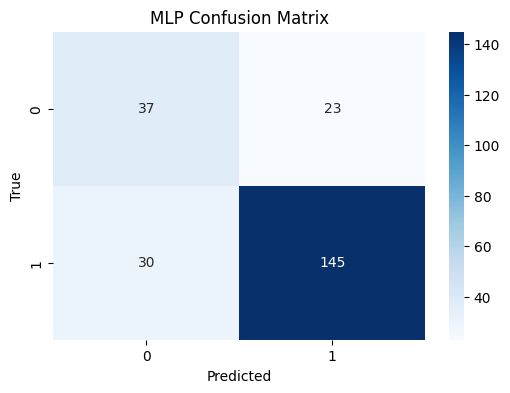

📈 MLP ROC AUC Score: 0.8420952380952381
🧮 MLP Kappa Score: 0.42880073377665673


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy for class_weight

# Data preparation (already done)
# X_train_res, y_train_res, X_test, y_test

# Feature Scaling (important for neural networks)
# Using the scaler fitted on the SMOTE resampled training data from previous steps if available,
# otherwise fit a new one on X_train_res
try:
    X_train_scaled = scaler.transform(X_train_res)
    X_test_scaled = scaler.transform(X_test)
    print("Using existing scaler.")
except NameError:
    print("Fitting new scaler.")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_res)
    X_test_scaled = scaler.transform(X_test)


# Compute class weights to handle imbalance (using resampled data for weight calculation)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_res), y=y_train_res)
class_weight_dict = dict(enumerate(class_weights))


# Build MLP model (can adjust layers, units, dropout, etc.)
mlp_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
optimizer = Adam(learning_rate=0.001)
mlp_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model with class weights and early stopping
history = mlp_model.fit(X_train_scaled, y_train_res,
                        validation_data=(X_test_scaled, y_test),
                        epochs=50, # Can adjust epochs
                        batch_size=32, # Can adjust batch size
                        class_weight=class_weight_dict,
                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)],
                        verbose=1)

# Predict probabilities and classes on test set
y_pred_prob_mlp = mlp_model.predict(X_test_scaled)
y_pred_mlp = (y_pred_prob_mlp > 0.5).astype("int32")

# Classification Report
print("🎯 MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print("📉 MLP Confusion Matrix:\n", cm_mlp)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC AUC Score
roc_auc_mlp = roc_auc_score(y_test, y_pred_prob_mlp)
print("📈 MLP ROC AUC Score:", roc_auc_mlp)

# Cohen Kappa Score
kappa_mlp = cohen_kappa_score(y_test, y_pred_mlp)
print("🧮 MLP Kappa Score:", kappa_mlp)

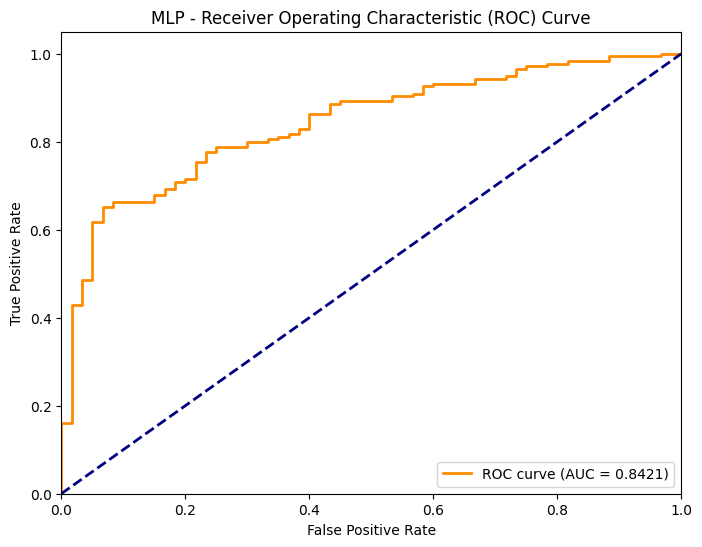

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc


# ROC Curve Plot
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_mlp:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

# 10.BILSTM

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Assuming X_train_res, y_train_res, X_test, y_test from your preprocessing pipeline

# Reshape your data (e.g., 1024 features into 32 timesteps with 32 features each)
timesteps = 32
features_per_step = 32

X_train_reshaped = X_train_res.values.reshape(-1, timesteps, features_per_step)
X_test_reshaped = X_test.values.reshape(-1, timesteps, features_per_step)

# Normalize features (fit scaler on flattened train data)
scaler = StandardScaler()
X_train_flat = X_train_reshaped.reshape(-1, timesteps * features_per_step)
X_test_flat = X_test_reshaped.reshape(-1, timesteps * features_per_step)

X_train_scaled_flat = scaler.fit_transform(X_train_flat)
X_test_scaled_flat = scaler.transform(X_test_flat)

# Reshape back to 3D for LSTM input
X_train_scaled = X_train_scaled_flat.reshape(-1, timesteps, features_per_step)
X_test_scaled = X_test_scaled_flat.reshape(-1, timesteps, features_per_step)

# Build BiLSTM model
model = models.Sequential([
    layers.Bidirectional(layers.LSTM(64), input_shape=(timesteps, features_per_step)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, y_train_res,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    verbose=2)

# Predict on test set
y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc:.4f}")


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 - 6s - 131ms/step - accuracy: 0.5874 - loss: 0.6612 - val_accuracy: 0.5234 - val_loss: 0.6592
Epoch 2/30
44/44 - 1s - 26ms/step - accuracy: 0.6590 - loss: 0.6089 - val_accuracy: 0.6340 - val_loss: 0.6139
Epoch 3/30
44/44 - 1s - 28ms/step - accuracy: 0.6819 - loss: 0.5644 - val_accuracy: 0.7447 - val_loss: 0.5514
Epoch 4/30
44/44 - 1s - 26ms/step - accuracy: 0.7092 - loss: 0.5332 - val_accuracy: 0.7362 - val_loss: 0.5503
Epoch 5/30
44/44 - 1s - 30ms/step - accuracy: 0.7679 - loss: 0.4778 - val_accuracy: 0.7447 - val_loss: 0.5871
Epoch 6/30
44/44 - 1s - 27ms/step - accuracy: 0.7808 - loss: 0.4510 - val_accuracy: 0.7447 - val_loss: 0.5517
Epoch 7/30
44/44 - 2s - 36ms/step - accuracy: 0.8023 - loss: 0.4225 - val_accuracy: 0.6383 - val_loss: 0.6711
Epoch 8/30
44/44 - 2s - 45ms/step - accuracy: 0.8073 - loss: 0.4065 - val_accuracy: 0.7362 - val_loss: 0.5652
Epoch 9/30
44/44 - 1s - 26ms/step - accuracy: 0.8044 - loss: 0.3837 - val_accuracy: 0.7404 - val_loss: 0.5899
Epoch 10/30
44/44 - 

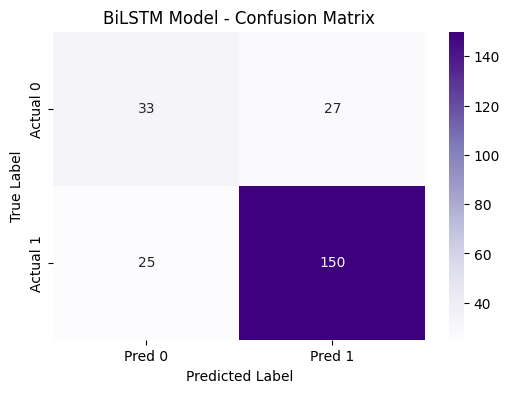

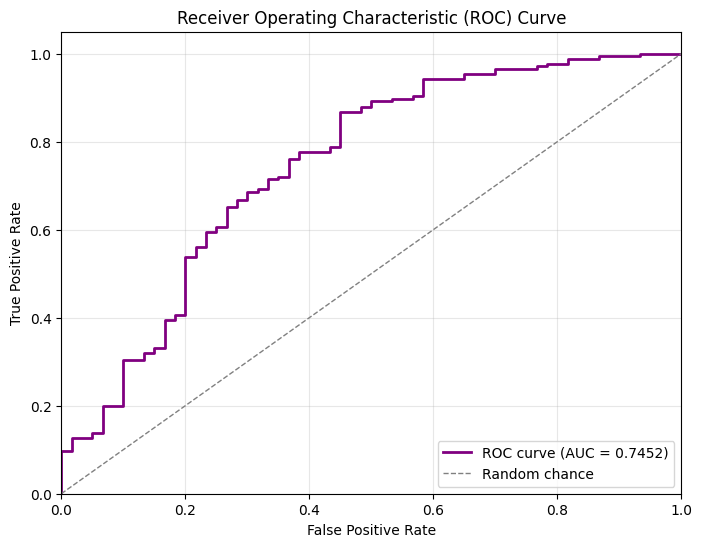

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("BiLSTM Model - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--', label='Random chance')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()
